DataAnalysisW1_3
Statistik tahlil (Bivariate analysis)
#Mean, Covariance, Correlation, similarity angle cos(theta), normalization, scaling

# Kerakli kutubxonalarni chaqirish

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Datasetni yuklash

In [6]:
calif =datasets.fetch_california_housing(as_frame=True)
df=calif.frame

In [7]:
df.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
14102,1.6444,16.0,3.217507,1.059682,1505.0,1.996021,32.75,-117.10,1.034
6416,3.5878,31.0,4.497375,1.035433,4131.0,2.710630,34.14,-118.02,2.228
12968,2.7868,15.0,5.338129,1.009592,1004.0,2.407674,38.70,-121.33,1.178
17597,5.8415,47.0,5.769784,1.021583,639.0,2.298561,37.30,-121.89,2.833
20625,4.1250,37.0,7.285714,1.214286,29.0,2.071429,39.12,-121.52,0.720
213,2.6042,46.0,4.489564,1.091082,1647.0,3.125237,37.79,-122.22,1.247
346,2.5625,33.0,4.475524,1.073427,999.0,3.493007,37.76,-122.17,0.893
4295,2.3317,29.0,3.031123,1.071719,2254.0,3.050068,34.09,-118.29,1.725
14093,2.0852,19.0,3.604613,1.014827,1304.0,2.148270,32.76,-117.11,1.144
6008,2.8594,48.0,5.307339,1.133028,677.0,3.105505,34.07,-117.76,1.272


In [8]:
aver_list=df["AveRooms"].values.tolist()
aver_array=df["AveRooms"].values
aver_frame=df["AveRooms"]

aveb_list=df["AveBedrms"].values.tolist()
aveb_array=df["AveBedrms"].values
aveb_frame=df["AveBedrms"]


#Covariance

Covariance - bu ko-variatsiya deb nomlanib, ma'lumotlarning ikkita o‘zgaruvchisi orasidagi assotsiyani yoki chiziqli bog‘liqlikni anglatadi

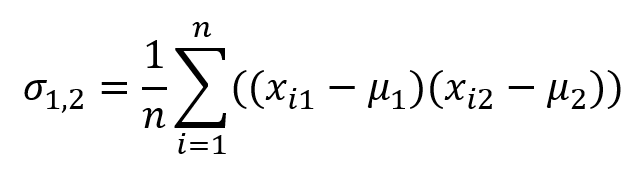

In [9]:
def calculate_covariance(aver_list, aved_list):
  if len(aver_list)!=len(aveb_list):
    raise ValueError("Lists X1 and X2 must have the same length")
  n=len(aver_list)
  mean_aver=sum(aver_list)/n
  mean_aveb=sum(aveb_list)/n

  covariance=sum((aver_list[i]-mean_aver)*(aveb_list[i]-mean_aveb) for i in range(n))/n
  return covariance

In [10]:
calculate_covariance(aver_list, aveb_list)

0.9938196481692929

#Correlation
Correlation - ma'lumotlarning ikki o‘zgaruvchisi orasidagi bog‘liqlikning standartlashtirilgan ko-variatsiyasi (Person's corrilation)

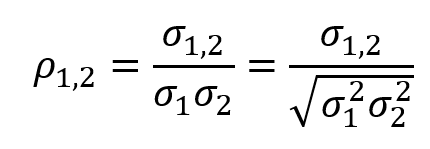

In [11]:
def calculate_correlation(X1, X2):
  if len(X1)!=len(X2):
    print(ValueError("Lists X1 and X2 must heve the same lenght")) # raise ValueError("Lists X1 and X2 must heve the same lenght")

  n=len(X1)
  mean_X1=sum(X1)/n
  mean_X2=sum(X2)/n

  #Calculate covariance
  cov=sum((X1[i]-mean_X1)*(X2[i]-mean_X2) for i in range(n))/n

  #Calculate the standart deviation of X1 and X2
  std_X1=(sum((x-mean_X1) ** 2 for x in X1) / n) ** 0.5
  std_X2=(sum((x-mean_X2) ** 2 for x in X2) / n) ** 0.5

  #Calculate the corrilation coefficient
  if std_X1==0 or std_X2==0:
    raise ValueError("standart deviation cannot be zero for corrilation coefficient")

  correlation=cov/(std_X1*std_X2)

  return correlation

In [12]:
calculate_correlation(aver_list, aveb_list)

0.847621325713045

In [13]:
df[['AveRooms', 'AveBedrms']].corr()

,AveRooms,AveBedrms
AveRooms,1.000000,0.847621
AveBedrms,0.847621,1.000000


#Probability density function - Continuous

PDF (Taqsimotning zichlik funksiyasi)ni topish oddiy emperik usulda hal qilish qiyin bo‘lgan masala, shuning uchun ham Kernel Density Estimation (KDE) usulidan foydalanib PDF topiladi.
Agarda taqsimot turi bizga ma'lum bo‘lsa, unda parametrik usulda PDF ni hisoplash mumkin. Unday bo‘lmasa, KDE dan foydalanish tavsiya etiladi.

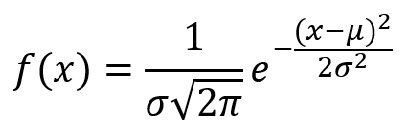

In [14]:
def calculate_pdf_vectorized(data):
  mu=np.mean(data)
  sigma=np.std(data, ddof=1)

  coeff=1/(sigma*np.sqrt(2*np.pi))

  exponent = np.exp(-((data-mu)**2)/(2*sigma **2))

  return coeff*exponent


In [15]:
pdf_volues=calculate_pdf_vectorized(aver_array)
print("PDF values for the sepal length data:")
print(pdf_volues)

PDF values for the sepal length data:
[0.13234029 0.15284664 0.0826995  ... 0.16058638 0.16111237 0.16084313]


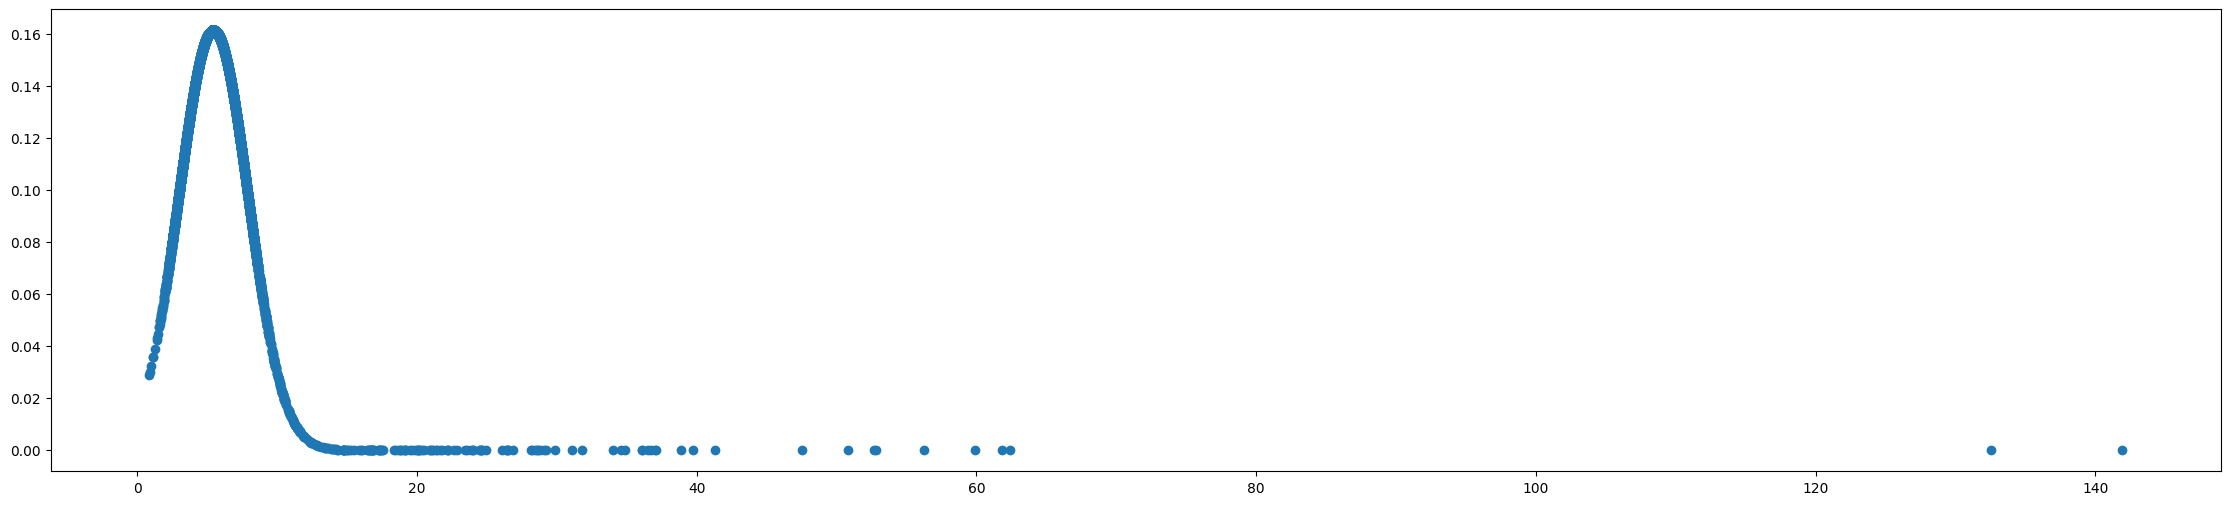

In [16]:
plt.figure(figsize=(28, 6))
plt.scatter(aver_array, pdf_volues)
plt.show()

#Scales and Normalizations

Min-Max scaling, Z-score normalization, MaxAbs scaling, Robust scaling

Min-Max scaling

In [17]:
def min_max(array):
  min_value=np.min(array)
  max_value=np.max(array)
  return (array-min_value)/(max_value-min_value)


In [18]:
min_max(aver_array)

array([0.0435123 , 0.03822395, 0.05275646, ..., 0.03090386, 0.03178269,
       0.03125246])

#Bivariate normal distribution
** Ikki o‘garuvchi uchun normal distriburion


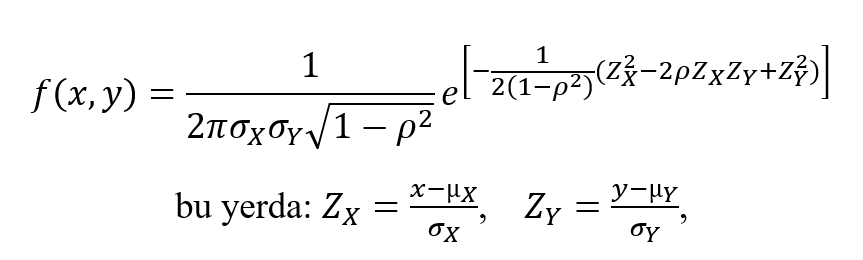

In [19]:
def calculate_bi_std_vectorized(X, Y):
    if len(X) != len(Y):
        raise ValueError("Lists X and Y must have the same length")

    X = X.ravel()
    Y = Y.ravel()

    # Mean va standard deviation
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    std_X = np.std(X)
    std_Y = np.std(Y)

    # Korrelatsiya koeffitsienti (rho)
    rho = np.corrcoef(X, Y)[0, 1]

    # Zx va Zy hisoblash
    Zx = (X - mean_X) / std_X
    Zy = (Y - mean_Y) / std_Y

    # Bivariate normal distribution formulasi
    coeff = 1 / (2 * np.pi * std_X * std_Y * np.sqrt(1 - rho**2))
    exponent = np.exp(-1 / (2 * (1 - rho**2)) * (Zx**2 - 2 * rho * Zx * Zy + Zy**2))

    # PDF qiymatlari
    return coeff * exponent

In [20]:
bi_std_vectorized=calculate_bi_std_vectorized(aver_array,aveb_array)

In [21]:
bi_std_vectorized

array([0.09091148, 0.1443312 , 0.02004493, ..., 0.24770539, 0.23927991,
       0.23801081])

In [22]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
X=aver_array
Y=aveb_array
X, Y = np.meshgrid(X, Y)
Z = calculate_bi_std_vectorized(X, Y)

# 3D plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
plt.title("Bivariate Normal Distribution")
plt.show()